In [1]:
from pandas import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv('BanglaNames.csv')
print ("%d names in dataset" %len(df))
df = df.drop_duplicates(subset="Name")
df.head(20)

1369 names in dataset


,Id,Name,Gender
0,0,fairuz,female
1,1,maliha,female
2,2,mehedi,male
3,3,sohan,male
4,4,shatil,male
5,5,akid,male
6,6,samia,female
7,7,tanvir,male
8,8,mobusshar,male
9,9,muqeet,male


In [3]:
print (df[df.Gender == 'female'].count())

Id        573
Name      573
Gender    573
dtype: int64


In [4]:
print (df[df.Gender == 'male'].count())

Id        436
Name      436
Gender    436
dtype: int64


In [5]:
Xfeatures =df['Name']
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
# Labels
y = df.Gender

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()
clfNB.fit(X_train,y_train)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
clfNB.score(X_train,y_train)

1.0

In [9]:
clfNB.score(X_test,y_test)

0.5792079207920792

In [10]:
clfNB

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
# Check if the name ends in vowel
def checkVowelEnd(name):
    if name[-1] in "aeiou":
        return "Vowel End"
    else:
        return "Consonant End"

In [15]:
df["Vowel/Consonant End"] = df["Name"].apply(checkVowelEnd)
df.head()

,Id,Name,Gender,Gender Value,Vowel/Consonant End
0,0,fairuz,female,0,Consonant End
1,1,maliha,female,0,Vowel End
2,2,mehedi,male,1,Vowel End
3,3,sohan,male,1,Consonant End
4,4,shatil,male,1,Consonant End


In [16]:
def checkGender(gender):
    if gender == "female":
        return 0
    else:
        return 1
    
df["Gender Value"] = df["Gender"].apply(checkGender)

df.head()

,Id,Name,Gender,Gender Value,Vowel/Consonant End
0,0,fairuz,female,0,Consonant End
1,1,maliha,female,0,Vowel End
2,2,mehedi,male,1,Vowel End
3,3,sohan,male,1,Consonant End
4,4,shatil,male,1,Consonant End


In [18]:
def compare(group):
    return df.groupby([group])["Gender Value"].sum()*100/df.groupby([group])["Gender Value"].count()

In [19]:
df.groupby(["Vowel/Consonant End"])['Gender Value'].count()
df.groupby(['Vowel/Consonant End','Gender Value']).size()

Vowel/Consonant End  Gender Value
Consonant End        0               186
                     1               376
Vowel End            0               387
                     1                60
dtype: int64

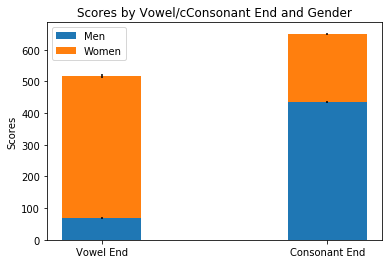

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (448,215)
MenMeans = (69,436)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Vowel/cConsonant End and Gender')
plt.xticks(ind, ('Vowel End', 'Consonant End'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [22]:
print (len(df))
# > 93889 = 43635 + 50254

1009


In [23]:
female_names = sum(df.groupby(["Vowel/Consonant End"])["Gender Value"].sum())
all_names = df.groupby(["Gender"])["Gender Value"].count()
print (all_names)
print ("\nBoth are equal? %s" % str(female_names == all_names["female"]))

Gender
female    573
male      436
Name: Gender Value, dtype: int64

Both are equal? False


In [24]:
print(df.groupby(["Vowel/Consonant End"])["Gender Value"].sum()*100/df.groupby(["Vowel/Consonant End"])["Gender Value"].count())

Vowel/Consonant End
Consonant End    66.903915
Vowel End        13.422819
Name: Gender Value, dtype: float64


In [25]:
print(compare("Vowel/Consonant End"))

Vowel/Consonant End
Consonant End    66.903915
Vowel End        13.422819
Name: Gender Value, dtype: float64


In [26]:
def vowelConsonantStart(name):
    if name[0] in "aeiou":
        return "Vowel Start"
    else:
        return "Consonant Start"

df["Vowel/Consonant Start"] = df["Name"].apply(vowelConsonantStart)
df.groupby(['Vowel/Consonant Start','Gender Value']).size()
#print("\n Comparison => %s", compare("Vowel/Consonant Start"))

#df.head()

Vowel/Consonant Start  Gender Value
Consonant Start        0               476
                       1               331
Vowel Start            0                97
                       1               105
dtype: int64

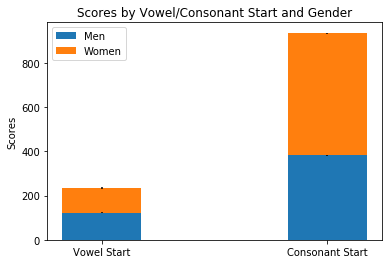

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (112,552)
MenMeans = (122,383)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Vowel/Consonant Start and Gender')
plt.xticks(ind, ('Vowel Start', 'Consonant Start'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [29]:
def shortLongName(name):
    if len(name) < 6:
        return "Short"
    else:
        return "Long"

df["Short/Long Name"] = df["Name"].apply(shortLongName)
df.groupby(['Short/Long Name','Gender Value']).size()
#print(compare("Short/Long Name"))
#df.head(20)

Short/Long Name  Gender Value
Long             0               349
                 1               226
Short            0               224
                 1               210
dtype: int64

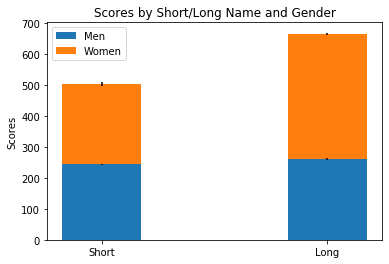

In [31]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (260,404)
MenMeans = (243,261)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Short/Long Name and Gender')
plt.xticks(ind, ('Short', 'Long'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [32]:
# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name.lower()
    return {
        'first-letter'  : name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter'   : name[-1],
        'last2-letters' : name[-2:],
        'last3-letters' : name[-3:],
    }

In [33]:
df["features"] = df["Name"].apply(features)
df.head()

,Id,Name,Gender,Gender Value,Vowel/Consonant End,Vowel/Consonant Start,Short/Long Name,features
0,0,fairuz,female,0,Consonant End,Consonant Start,Long,"{'first-letter': 'f', 'first2-letters': 'fa', ..."
1,1,maliha,female,0,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'ma', ..."
2,2,mehedi,male,1,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'me', ..."
3,3,sohan,male,1,Consonant End,Consonant Start,Short,"{'first-letter': 's', 'first2-letters': 'so', ..."
4,4,shatil,male,1,Consonant End,Consonant Start,Long,"{'first-letter': 's', 'first2-letters': 'sh', ..."


In [34]:
def checkfeature(name):
    if name[-1] in "a,e":
        return "a"
    return "b"
df["Feature End"] = df["Name"].apply(checkfeature)
df.head(-20)

,Id,Name,Gender,Gender Value,Vowel/Consonant End,Vowel/Consonant Start,Short/Long Name,features,Feature End
0,0,fairuz,female,0,Consonant End,Consonant Start,Long,"{'first-letter': 'f', 'first2-letters': 'fa', ...",b
1,1,maliha,female,0,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'ma', ...",a
2,2,mehedi,male,1,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'me', ...",b
3,3,sohan,male,1,Consonant End,Consonant Start,Short,"{'first-letter': 's', 'first2-letters': 'so', ...",b
4,4,shatil,male,1,Consonant End,Consonant Start,Long,"{'first-letter': 's', 'first2-letters': 'sh', ...",b
...,...,...,...,...,...,...,...,...,...
1333,1333,mounota,female,0,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'mo', ...",a
1334,1334,tanbin,female,0,Consonant End,Consonant Start,Long,"{'first-letter': 't', 'first2-letters': 'ta', ...",b
1335,1335,nafia,female,0,Vowel End,Consonant Start,Short,"{'first-letter': 'n', 'first2-letters': 'na', ...",a
1339,1339,disha,female,0,Vowel End,Consonant Start,Short,"{'first-letter': 'd', 'first2-letters': 'di', ...",a


In [35]:
g=df.groupby(['Feature End','Gender'])
g.head()

,Id,Name,Gender,Gender Value,Vowel/Consonant End,Vowel/Consonant Start,Short/Long Name,features,Feature End
0,0,fairuz,female,0,Consonant End,Consonant Start,Long,"{'first-letter': 'f', 'first2-letters': 'fa', ...",b
1,1,maliha,female,0,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'ma', ...",a
2,2,mehedi,male,1,Vowel End,Consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'me', ...",b
3,3,sohan,male,1,Consonant End,Consonant Start,Short,"{'first-letter': 's', 'first2-letters': 'so', ...",b
4,4,shatil,male,1,Consonant End,Consonant Start,Long,"{'first-letter': 's', 'first2-letters': 'sh', ...",b
5,5,akid,male,1,Consonant End,Vowel Start,Short,"{'first-letter': 'a', 'first2-letters': 'ak', ...",b
6,6,samia,female,0,Vowel End,Consonant Start,Short,"{'first-letter': 's', 'first2-letters': 'sa', ...",a
7,7,tanvir,male,1,Consonant End,Consonant Start,Long,"{'first-letter': 't', 'first2-letters': 'ta', ...",b
16,16,khaja,male,1,Vowel End,Consonant Start,Short,"{'first-letter': 'k', 'first2-letters': 'kh', ...",a
23,23,sadiqua,female,0,Vowel End,Consonant Start,Long,"{'first-letter': 's', 'first2-letters': 'sa', ...",a


In [36]:
names =(df.groupby(['Feature End','Gender'])).size()
#female_names =(df.groupby(['features','Gender Value'])).count()

#all_names = df.groupby(["Gender"])["Gender Value"].count()
print (names)

Feature End  Gender
a            female    316
             male       24
b            female    257
             male      412
dtype: int64


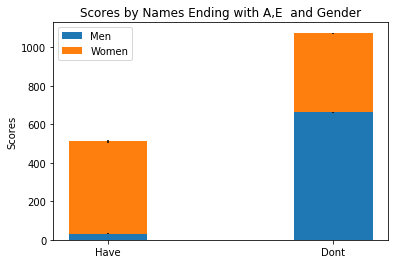

In [37]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (479,410)
MenMeans = (32,662)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Names Ending with A,E  and Gender')
plt.xticks(ind, ('Have', 'Dont'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [38]:
 training_data = df[["Gender Value", "Vowel/Consonant Start", "Short/Long Name", "Vowel/Consonant End","Feature End"]]
# training_data.head()

In [39]:
X= df[['Vowel/Consonant Start', 'Short/Long Name', 'Vowel/Consonant End','Feature End']]
y= df ['Gender Value']

In [31]:
def reprCategory(column):
    column = column.astype("category")
    return column.cat.codes
    
#training_data[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]] = training_data[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]].apply(reprCategory)
X[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]] = X[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]].apply(reprCategory)
#training_data.head()
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20)

#train,test = train_test_split(training_data, test_size = 0.20)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
len(X_train)


807

In [33]:
len(X_test)


202

In [34]:
len(y_train)


807

In [35]:
len(y_test)

202

In [36]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB_clf = MultinomialNB()


In [37]:
MultinomialNB_clf.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
MultinomialNB_clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [76]:
df= MultinomialNB_clf.predict(X_test)
print (str(df))

[0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1]


In [35]:
y_test

199     1
1263    0
83      0
1226    0
1248    0
       ..
402     0
357     0
139     0
682     0
41      1
Name: Gender Value, Length: 202, dtype: int64

In [40]:
MultinomialNB_clf.score(X_train,y_train)

0.7496902106567535

In [39]:
MultinomialNB_clf.score(X_test,y_test)

0.7821782178217822

In [41]:
MultinomialNB_clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
# Dicision Tree Classifier
DecisionTreeClassifier_clf = DecisionTreeClassifier()
DecisionTreeClassifier_clf = DecisionTreeClassifier_clf.fit(X_train,y_train)


In [44]:
DecisionTreeClassifier_clf.score(X_train,y_train)

0.7509293680297398

In [45]:
DecisionTreeClassifier_clf.score(X_test,y_test)

0.7821782178217822

In [46]:
DecisionTreeClassifier_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logreg_clf.score(X_train,y_train)

0.7496902106567535

In [50]:
logreg_clf.score(X_test,y_test)

0.7821782178217822

In [51]:
logreg_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
SVC_model = SVC()
SVC_model.fit(X_train,y_train)
#prediction = SVC_model.predict(test[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]])
#accuracy_score(test["Gender Value"], prediction)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
SVC_model.score(X_train,y_train)

0.7496902106567535

In [55]:
SVC_model.score(X_test,y_test)

0.7821782178217822

In [49]:
SVC_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
KNN_model = KNeighborsClassifier(n_neighbors=25)
KNN_model.fit(X_train,y_train)
#predictions = KNN_model.predict(test[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]])
#accuracy_score(test["Gender Value"], predictions)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [58]:
KNN_model.score(X_train,y_train)

0.748451053283767

In [59]:
KNN_model.score(X_test,y_test)

0.7376237623762376

In [60]:
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [61]:
# try K=1 through K=25 and record testing accuracy
from sklearn import metrics
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7574257425742574, 0.6386138613861386, 0.7376237623762376, 0.5346534653465347, 0.6188118811881188, 0.6188118811881188, 0.6188118811881188, 0.6188118811881188, 0.6188118811881188, 0.6188118811881188, 0.6188118811881188, 0.6188118811881188, 0.7376237623762376, 0.6188118811881188, 0.6188118811881188, 0.6633663366336634, 0.7821782178217822, 0.7821782178217822, 0.7376237623762376, 0.7821782178217822, 0.7376237623762376, 0.7376237623762376, 0.7376237623762376, 0.7376237623762376, 0.7376237623762376]


Text(0, 0.5, 'Testing Accuracy')

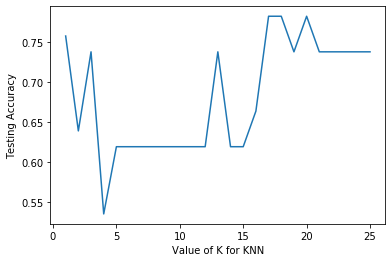

In [62]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [65]:
lda_clf.score(X_train,y_train)

0.7496902106567535

In [66]:
lda_clf.score(X_test,y_test)

0.7821782178217822

In [67]:
lda_clf

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

gnb_clf.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
gnb_clf.score(X_train,y_train)

0.7496902106567535

In [70]:
gnb_clf.score(X_test,y_test)

0.7821782178217822

In [71]:
gnb_clf

GaussianNB(priors=None, var_smoothing=1e-09)

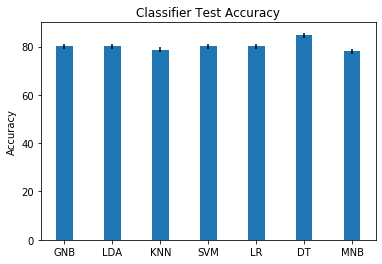

In [51]:



import numpy as np
import matplotlib.pyplot as plt

N = 7
Testscore = (80.19,80.19,78.71,80.19,80.19,84.73,78.12)
#MenMeans = (32,662)
menStd = (1,1,1,1,1,1,1)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Testscore, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)


plt.ylabel('Accuracy')
plt.title('Classifier Test Accuracy')
plt.xticks(ind, ('GNB', 'LDA','KNN','SVM','LR','DT','MNB'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [46]:
with open("decidenamesB.dot", "w") as dot_file:
    dot_file = export_graphviz(DecisionTreeClassifier_clf,
                            feature_names=["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start",""], out_file=dot_file)

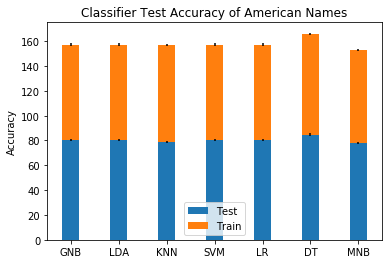

In [54]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
Testscore = (80.19,80.19,78.71,80.19,80.19,84.73,78.12)
TrainMeans = (76.97,76.97,78.09,76.97,76.97,81.09,74.97)
menStd = (1,1,1,1,1,1,1)
womenStd = (1, 1,1,1,1,1,1)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Testscore, width, yerr=menStd)
p2 = plt.bar(ind, TrainMeans, width,bottom=Testscore, yerr=womenStd)


plt.ylabel('Accuracy')
plt.title('Classifier Test Accuracy of American Names')
plt.xticks(ind, ('GNB','LDA','KNN','SVM','LR','DT','MNB'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Test', 'Train'))

plt.show()